<a href="https://colab.research.google.com/github/jwxu19/project1/blob/master/RecSysGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import os
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/My Drive/RecSys"
os.chdir(path)
os.listdir(path)

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_metrics():
  file=open("metrics.pkl","rb")
  data=pickle.load(file)
  file.close()
  return data
  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def make_df(data):
  ls_name, cv_rmse, cv_precision, cv_recall, cv_fit_time, cv_pred_time, algo_name=data
  
  precision=[]
  for i in cv_precision:
    precision.append({k: np.mean(v) for k, v in i.items()})


  recall=[]
  for i in cv_recall:
    recall.append({k: np.mean(v) for k, v in i.items()})


  df_precision=pd.DataFrame(precision, index=algo_name).T
  df_recall=pd.DataFrame(recall, index=algo_name).T
  
  rmse=[np.mean(i) for i in cv_rmse]
  fit_time=[np.mean(i) for i in cv_fit_time]
  pred_time=[np.mean(i) for i in cv_pred_time]

  df=pd.DataFrame([rmse,fit_time,pred_time], index=["rmse", "fit_time", "test_time"], columns=algo_name)
  
  return df_precision, df_recall, df

In [0]:
def plot_precsion_recall_k(df_precision, df_recall):
  

  ax1=df_precision.plot.line(title="Precision Comparsion of Algo at different k")
  ax1.set_xlabel("k")
  ax1.set_ylabel("Precision")

  ax2=df_recall.plot.line(title="Recall Comparsion of Algo at different k")
  ax2.set_xlabel("k")
  ax2.set_ylabel("Recall")
 
  
  return ax1, ax2


  

In [0]:

def show_table(df_precision, df_recall, df):
  
  print("Precision")
  print(df_precision)
  print("Recall")
  print(df_recall)
  print("Rmse, Fit Time, Test Time")
  print(df)
  



  
#ax1=df.loc["rmse"].plot.barh(title="RMSE Comparsion")
#ax1.set_ylabel("rmse")

#ax2=df.loc["fit_time"].plot.barh(title="Fit Time Comparsion")
#ax2.set_ylabel("fit time")

#ax3=df.loc["test_time"].plot.barh(title="Test Time Comparsion")
#ax3.set_ylabel("test time")

In [0]:
def main():
  data=load_metrics()
  df_precision, df_recall, df=make_df(data)
  plot_precsion_recall_k(df_precision, df_recall)
  show_table(df_precision, df_recall, df)

Precision
    KNNWithMeans       SVD 
3        0.909996  0.909893
5        0.905315  0.904852
7        0.903212  0.902675
10       0.901984  0.901243
Recall
    KNNWithMeans       SVD 
3        0.519894  0.527862
5        0.606233  0.611733
7        0.638572  0.642876
10       0.657828  0.661603
Rmse, Fit Time, Test Time
           KNNWithMeans        SVD 
rmse            1.001449   0.983947
fit_time       23.016061  42.045674
test_time      22.179636   1.778085


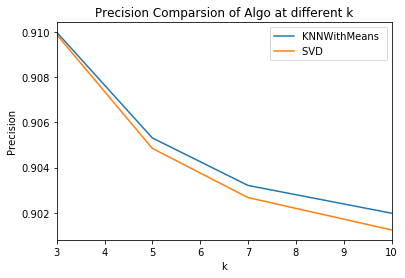

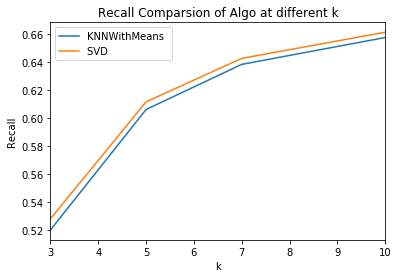

In [92]:
main()